<a href="https://colab.research.google.com/github/nchebet09/Naomi-s-Week-4-IP-Core/blob/master/Naomi's_Core_Week_4_IP_on_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Dataset an Initial Exploration

In [ ]:
# importing our libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# loading data and previewing the head
# url = http://bit.ly/DSCoreAutolibDataset

autolib = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
# preview the tail
autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
# checking for the shape of the dataset
autolib.shape

(16085, 13)

In [ ]:
# checking for statistical summary of the dataset
autolib.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [ ]:
# checking for null values
autolib.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [ ]:
# checking for data types

autolib.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [ ]:
# checking for unique variables in all the columns
autolib.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [ ]:
# To better understand the data, let's go over each column and check for unique values
autolib['Postal code'].unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

In [ ]:
autolib['date'].unique()

array(['1/1/2018', '1/2/2018', '1/3/2018', '1/4/2018', '1/5/2018',
       '1/6/2018', '1/7/2018', '1/8/2018', '1/9/2018', '1/10/2018',
       '1/11/2018', '1/12/2018', '1/13/2018', '1/14/2018', '1/15/2018',
       '1/16/2018', '1/17/2018', '1/18/2018', '1/19/2018', '1/20/2018',
       '1/21/2018', '1/22/2018', '1/23/2018', '1/24/2018', '1/25/2018',
       '1/26/2018', '1/27/2018', '1/28/2018', '1/29/2018', '1/30/2018',
       '1/31/2018', '2/1/2018', '2/2/2018', '2/3/2018', '2/4/2018',
       '2/5/2018', '2/6/2018', '2/7/2018', '2/8/2018', '2/9/2018',
       '2/10/2018', '2/11/2018', '2/12/2018', '2/13/2018', '2/14/2018',
       '2/15/2018', '2/16/2018', '2/17/2018', '2/18/2018', '2/19/2018',
       '2/20/2018', '2/21/2018', '2/22/2018', '2/23/2018', '2/24/2018',
       '2/28/2018', '3/1/2018', '3/2/2018', '3/3/2018', '3/4/2018',
       '3/5/2018', '3/6/2018', '3/7/2018', '3/8/2018', '3/9/2018',
       '3/10/2018', '3/11/2018', '3/12/2018', '3/13/2018', '3/14/2018',
       '3/15/2018',

In [ ]:
autolib['n_daily_data_points'].unique()

array([1440, 1438, 1439, 1320, 1437, 1434, 1398, 1420, 1425, 1396, 1429,
       1389, 1380, 1364, 1318, 1377, 1203, 1417, 1435, 1174, 1436, 1411,
       1370])

In [ ]:
autolib['dayOfWeek'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
autolib['day_type'].unique()

array(['weekday', 'weekend'], dtype=object)

In [ ]:
autolib['BlueCars_taken_sum'].unique()

array([ 110,   98,  138,  104,  114,  187,  180,   84,   81,   88,  125,
        126,  224,  193,  107,  116,  118,  122,  130,  217,  143,  123,
        112,  108,  145,  216,  190,   83,  103,  146,  199,  186,  121,
        113,  109,  207,  160,  115,   94,   99,  119,  176,  157,   85,
        100,  135,    8,   92,  127,  136,  192,  168,  102,  134,  197,
        173,  131,  196,  150,  156,  231,  105,  219,  179,  124,  188,
        139,   97,  120,  159,  147,  151,  129,  152,  142,  141,  202,
        175,   96,  133,  254,  137,  185,  203,    6,  166,  165,  243,
        264,  213,  164,  163,  191,  276,  210,  183,  148,  270,  128,
        280,  178,  153,  158,  259,  161,  240,   12,  181,  140,  263,
        167,  177,  250,  208,  171,  266,  155,  247,  154,  184,  293,
        228,  182,  144,  218,  162,  239,  200,  170,  174,  172,  245,
          5,  195,  237,  331,  283,  212,  211,  380,  356,  233,  220,
        238,  384,  313,  229,  221,  201,  350,  3

In [ ]:
autolib['BlueCars_returned_sum'].unique()

array([ 103,   94,  139,  104,  117,  185,  180,   83,   84,   85,  125,
        127,  223,  193,  107,  116,  118,  122,  130,  217,  150,  113,
        146,  218,  189,   81,  110,  147,  204,  121,   99,  112,  109,
        207,  165,  111,   93,  119,  176,  158,   86,   98,  135,    9,
         91,  131,  137,  138,  208,  177,  124,  101,  145,  203,  169,
         96,  136,  142,  196,  154,  100,   97,  144,  128,  179,  151,
        115,  232,  105,  219,  143,  190,  102,  159,  155,  156,  120,
        141,  201,  133,  253,  199,   95,  108,  188,  126,  206,  174,
          7,  244,  197,  153,  264,  148,  164,  277,  213,  149,  175,
        270,  198,  280,  161,  178,  152,  160,  257,  205,  240,  123,
        157,   12,  265,  186,  173,  140,  171,  167,  255,  209,  170,
        266,  248,  243,  183,  292,  222,  134,  236,  132,  181,  172,
        184,  168,  162,  237,  163,  233,  202,  283,  192,  252,  211,
          6,  250,  187,  229,  249,  338,  293,  2

In [ ]:
autolib['Slots_freed_sum'].unique()

array([ 22,  23,  27,  25,  18,  38,  34,  14,  15,  11,  19,  16,  21,
        17,  41,  24,  20,  35,  36,  32,  13,  28,  12,  26,   0,  48,
        30,  29,  31,  47,  33,  40,  37,   9,  10,  43,  44,  49,  39,
        42,  45,  51,  46,  59,  64,  56,  52,   1,  50,  95,  84,  83,
        81,  58,  61,  67, 101,  86,  63,  97,  60,  57,  65,  80,  79,
        77,  54,  85,  75,  73,  55,   3,  62,  82,  71,  69,  74,  89,
        91, 109,  70,  76,  72,  68,  78,  53,  66,  87,   2,   5, 120,
       111,  92, 110,  88, 103, 142, 115, 105, 113, 121,  96,  90, 134,
       140, 130,  94,  99, 128, 100, 129,  98, 118, 106, 119, 117, 102,
       107,  93, 135, 104, 122, 133, 108, 112, 116, 123, 136, 126,   6,
       114, 132, 177, 167, 125, 124, 131, 143, 139, 137, 153, 180, 157,
       162, 152, 151, 149, 156, 145, 173, 147, 211, 127, 141, 161, 144,
       163, 138, 171, 158, 148, 168, 154, 166, 150, 170, 146, 165, 178,
       174, 175, 176, 181, 190, 160, 184, 205, 253, 252, 155, 19

In [ ]:
autolib['Slots_taken_sum'].unique()

array([ 20,  22,  27,  21,  35,  34,  15,  13,  38,  19,  39,  25,  14,
         9,  37,  36,  30,  16,  11,  28,  33,  18,  12,   0,  31,  23,
        26,  50,  17,  40,  24,  48,  32,   8,  29,  42,  43,  49,  45,
        41,  44,  52,  59,  46,  65,  47,  57,  51,   1,  97,  87,  54,
        84,  83,  60,  69, 103,  58,  62,  92,  67,  78,  82,  77,  53,
        88,  72,  66,  99,  64,  55,  75, 113,  63,  74,  71,  89,  68,
        81,  73,  70,  61,  79,  56,  76,  86,   2, 118, 108, 107, 144,
       114,  93, 105, 106, 115, 122,  90,  80,  98,  85, 139, 136, 128,
        94, 126,  95,   4, 130, 102,  96, 129, 138, 111, 124, 101, 109,
       116, 110, 134,  91, 119, 137, 100,   3, 104, 112,   6, 177, 125,
       120, 123, 131, 135, 140, 132, 155, 182, 154, 164, 121, 151, 157,
       147, 117, 153, 160, 141, 172, 161,   5, 213, 145, 143, 162, 127,
       148, 169, 149, 171, 167, 163, 166, 133, 158, 159, 150, 174, 173,
       178, 152,   7, 176, 179, 165, 180, 142, 188, 185, 183,  1

## Data Cleaning

In [ ]:
# step 1: aligning column names i.e removing spaces, caps

autolib.columns = autolib.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('_sum', '')
autolib.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken,bluecars_returned,utilib_taken,utilib_returned,utilib_14_taken,utilib_14_returned,slots_freed,slots_taken
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
# step 2: Converting date to the datetime frame and checking to make sure that the date has been converted:
autolib['date'] = pd.to_datetime(autolib['date'])
autolib.dtypes


postal_code                     int64
date                   datetime64[ns]
n_daily_data_points             int64
dayofweek                       int64
day_type                       object
bluecars_taken                  int64
bluecars_returned               int64
utilib_taken                    int64
utilib_returned                 int64
utilib_14_taken                 int64
utilib_14_returned              int64
slots_freed                     int64
slots_taken                     int64
dtype: object

In [ ]:
# step 3: checking for duplicates

autolib.columns.duplicated()

# There are no duplicates in our dataset

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [ ]:
# step 4: drop the unnecessary columns. Our focus is on Bluecars taken in relation to postal code, and daytype 
# thus we will drop the other columns including date and n_daily_data_points

autolib.drop(autolib.columns[7:13], axis=1, inplace=True)
autolib.drop(autolib.columns[1:4], axis=1, inplace=True)
autolib.drop(['bluecars_returned'], axis=1, inplace=True)
autolib.head(10)

,postal_code,day_type,bluecars_taken
0,75001,weekday,110
1,75001,weekday,98
2,75001,weekday,138
3,75001,weekday,104
4,75001,weekday,114
5,75001,weekend,187
6,75001,weekend,180
7,75001,weekday,84
8,75001,weekday,81
9,75001,weekday,88


In [ ]:
# step 5: since our focus is on weekends, let's drop all the rows with weekdays
autolib_cleaned = autolib[autolib.day_type != 'weekday']
autolib_cleaned

,postal_code,day_type,bluecars_taken
5,75001,weekend,187
6,75001,weekend,180
12,75001,weekend,224
13,75001,weekend,193
19,75001,weekend,217
...,...,...,...
16068,95880,weekend,36
16074,95880,weekend,15
16075,95880,weekend,34
16081,95880,weekend,19


In [ ]:
# step 6: checking for shape
autolib_cleaned.shape

(4541, 3)

In [ ]:
# step 7: checking for statistical summary of the remaining data
autolib_cleaned.describe()

,postal_code,bluecars_taken
count,4541.000000,4541.000000
mean,88794.686633,151.090068
std,7646.521844,218.565642
min,75001.000000,0.000000
25%,91330.000000,25.000000
50%,92340.000000,59.000000
75%,93400.000000,156.000000
max,95880.000000,1352.000000


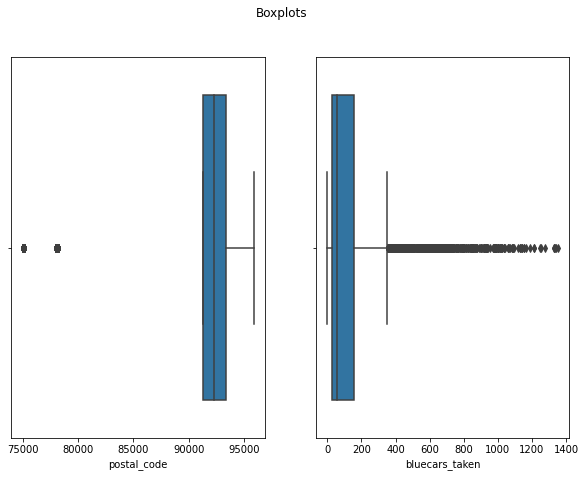

In [ ]:
# step 8: checking for outliers

fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(autolib_cleaned['postal_code'], ax=ax1)
sns.boxplot(autolib_cleaned['bluecars_taken'], ax=ax2)
plt.show()

On the postal code box plot we see some outliers at around 75000 and 80000, we wont drop these outliers because there are cities in paries that use these postal codes. 

As for the 'bluecars taken' box plot we see a bunch of outliers after the 400 mark, this could suggest that there are days when the bluecars taken were in high demand in comparison to other days. We also won't be drop these values because they make sense

## Exploratory Data Analysis

### 1. Univariate Analysis

In [ ]:
# calculating the mean of bluecars taken from all the postal codes

autolib_cleaned['bluecars_taken'].mean()

151.09006826690157

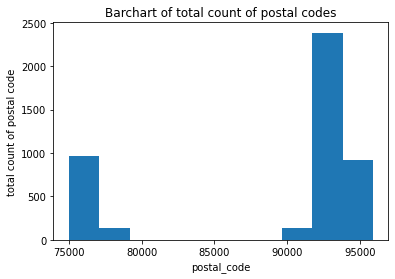

In [ ]:
# plotting a histogram for postal code to see the distribution

postal_code = autolib_cleaned['postal_code']

plt.hist(postal_code, histtype='bar', rwidth=1)
plt.xlabel('postal_code')
plt.ylabel('total count of postal code')
plt.title('Barchart of total count of postal codes')
plt.show()

From the chart, we see that most of the bluecars were taken from 90000 plus postal code

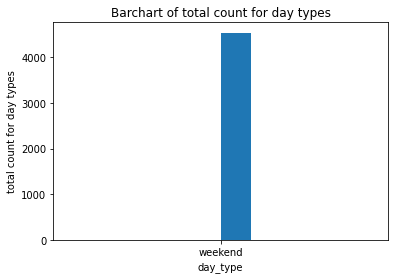

In [ ]:
# plotting a histogram for day of the week to see the distribution
day_type = autolib_cleaned['day_type']

plt.hist(day_type, histtype='bar', rwidth=1)
plt.xlabel('day_type')
plt.ylabel('total count for day types')
plt.title('Barchart of total count for day types')
plt.show()

Based in our dataset, the total number of weekends(saturday and Sunday) is around 4000

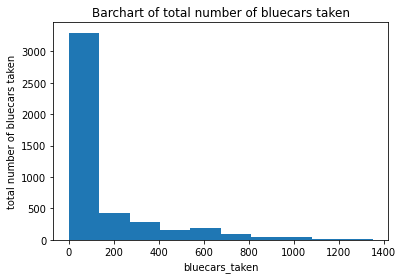

In [ ]:
# plotting a histogram for day of the week to see the distribution
bluecars_taken = autolib_cleaned['bluecars_taken']

plt.hist(bluecars_taken, histtype='bar', rwidth=1)
plt.xlabel('bluecars_taken')
plt.ylabel('total number of bluecars taken')
plt.title('Barchart of total number of bluecars taken')
plt.show()

The histogram shows bluecars taken distribution with data skewed to the right, which indicate that the outliers were concentrated on the right

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f116d488748>,
      dtype=object)

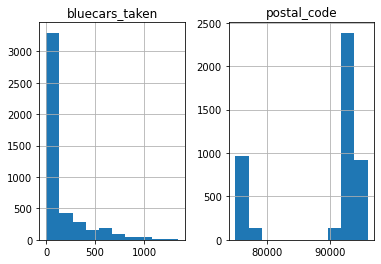

In [ ]:
# plotting univariate summaries and recording our observations

autolib_cleaned.hist()

### 2. Bivariate Analysis

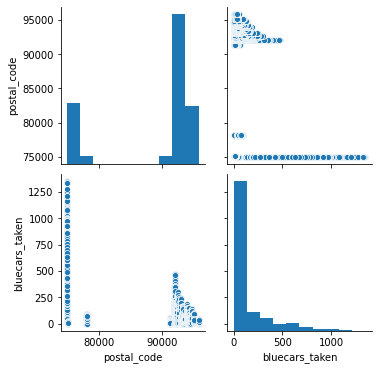

In [ ]:
# Plotting bivariate summaries and recording our observations
sns.pairplot(autolib_cleaned)
plt.show()

In [ ]:
# grouping bluecars taken by postal code to find the total number of cars taken in each postal code on the weekends

bluecars_grouped = autolib_cleaned.pivot_table(['bluecars_taken'], ['postal_code'], aggfunc='sum').reset_index()
bluecars_grouped.head(10)


,postal_code,bluecars_taken
0,75001,7864
1,75002,9340
2,75003,13534
3,75004,12116
4,75005,16086
5,75006,14165
6,75007,14371
7,75008,18975
8,75009,17081
9,75010,18136


In [ ]:
#  finding the average number of cars taken per postal code

bluecars_grouped_mean = autolib_cleaned.pivot_table(['bluecars_taken'], ['postal_code'], aggfunc='mean').reset_index()
bluecars_grouped_mean.head(10)

,postal_code,bluecars_taken
0,75001,178.727273
1,75002,212.272727
2,75003,307.590909
3,75004,275.363636
4,75005,365.590909
5,75006,321.931818
6,75007,326.613636
7,75008,431.250000
8,75009,388.204545
9,75010,412.181818


## Hypothesis Testing

Claim to test: is there a difference between the average number of bluecars taken from postal codes 75006 and 75007?

Null Hypothesis, H0: there is no difference between the average number of blue cars taken on the weekends from postal codes 75006 and 75007


Alternative Hypothesis, H1: there is a difference between the average number of blue cars taken on the weekends from postal codes 75006 and 75007

In [ ]:
# Before selecting a random sample we start with selecting rows with postal codes 75006 and 75007.
# the reason for doing this is because we have established that our focus will be on the two postal codes only

autolib_cleaned_codes = autolib_cleaned. loc[((autolib_cleaned['postal_code'] == 75006) | (autolib_cleaned['postal_code'] == 75007))] 
autolib_cleaned_codes.head()

,postal_code,day_type,bluecars_taken
785,75006,weekend,365
786,75006,weekend,303
792,75006,weekend,397
793,75006,weekend,348
799,75006,weekend,405


In [ ]:
# check for the shape
autolib_cleaned_codes.shape

(88, 3)

In [ ]:
# checking for statistical summaries of the cars taken from the two postal codes
autolib_cleaned_codes.describe()

,postal_code,bluecars_taken
count,88.000000,88.000000
mean,75006.500000,324.272727
std,0.502865,66.758396
min,75006.000000,20.000000
25%,75006.000000,298.250000
50%,75006.500000,324.500000
75%,75007.000000,369.000000
max,75007.000000,421.000000


### Sampling

In [ ]:
# The next step is to perform sampling for hypothesis testing
# the population = N = 88 = total count of the two postal codes where blue cars were taken
# sample size =n = 11

autolib_cleaned_codes_sample = autolib_cleaned_codes.sample(n=11, replace='False')
autolib_cleaned_codes_sample

,postal_code,day_type,bluecars_taken
1057,75007,weekend,360
852,75006,weekend,391
800,75006,weekend,356
1002,75007,weekend,310
969,75007,weekend,411
1089,75007,weekend,312
887,75006,weekend,330
994,75007,weekend,309
1067,75007,weekend,400
925,75006,weekend,359


In [ ]:
# checking for the mean of blue cars taken for the sample

round(autolib_cleaned_codes_sample['bluecars_taken'].mean(),2)

350.55

In [ ]:
# checking for bluecars taken sample standard deviation

round(autolib_cleaned_codes_sample['bluecars_taken'].std(),2)

37.77

### T-test

In [ ]:
# since sample size is less than 30, we will use t-statistic

n = 11
sample_mean = 350.55
pop_mean = 324.272727
sample_std = 37.77
degrees_of_freedom = n-1
# based on our alternative hypothesis statement we have a two-tailed test hence alpha is divided by 2
alpha = 0.05/2

t_critical = stats.t.ppf(alpha, degrees_of_freedom)
print('The t-critical value is', t_critical)

t_statistic = (sample_mean - pop_mean)/(sample_std / np.sqrt(n))
print('t-statistic value is', t_statistic)


# Decision: the t-statistic is greater than the t-critical value, hence we reject the null hypothesis
# Interpretation: there is enough significance statistical evidence to suggest that 
# the average number of bluecars taken from postal code 75006 and 756007 is different


The t-critical value is -2.2281388519649385
t-statistic value is 2.307435929434385
